# <font color="#ff9900"> **Perceptron**</font>
---

O <font color="#66ffff">**Perceptron**</font> de Rosenblatt (1957) foi a primeira *neural network* (NN) descrita com um algoritmo de treinamento, sendo, apesar de suas limitações, a pedra fundamental das modernas NNs. 

Essencialmente o modelo perceptron é um **classificador linear**. Isto é, o objetivo é encontrar um **"hiperplano"** (uma linha no espaço $2D$, um plano no espaço $3D$ ou outros análogos em espaços superiores) **separando os dados em duas classes**. 

Definição
--
Matematicamente um modelo Perceptron pode ser representado como $y = f(w \cdot x + b)$, sendo que $x$ é um vetor de entrada (*input*) formado de valores reais, $w$ é o vetor de pesos (*weights*), $b$ o termo *bias* e f é a função de ativação. O *bias* é independente da entrada e desloca o limite de decisão da sua origem.

A função de ativação $f$ é uma função *threshold* que mapeia as entradas $x$ em um valor de saída que é um valor binário único (1 ou 0), da forma
\begin{align}
        f(x) = \left\{
        \begin{array}{cl}
        1 & if \ w  \cdot x + b \gt 0,  \\
        0 & otherwise
        \end{array}
        \right.
\end{align}

$w \cdot x$ é o produto escalar (*dot product*), isto é, $ \sum_{i=1}^m w_i x_i$, onde $m$ é o número de entradas do perceptron.


Algoritmo de Aprendizado
--
O algoritmo de treinamento do Perceptron (de uma camada) foi proposto por Rosenblatt e bastante inspirado na regra Hebb (*Hebbian learning*). Em seu livro *The Organization of Behavior* (1949), Donald Olding Hebb sugeriu que quando um neurônio biológico dispara outro neurônio frequentemente a conexão entre esses dois neurônios é fortalecida.

Perceptrons são treinados usando uma variante dessa regra levando em consideração o erro cometido pela rede quando ela faz uma predição. A regra de aprendizado do Perceptron reforça as conexões ajudando a reduzir o erro.

O algoritmo de aprendizado pode ser sumarizado nos seguintes passos:

1. Inicialize os pesos e *bias* para valores aleatórios pequenos. 

2. Para cada par entrada-saída $(x, d)$, compute a saída predita $y$ fazendo $f(w \cdot x + b)$. 

3. Atualize os pesos e *bias* baseado no erro $e = d - y$ fazendo, $w = w + \eta \cdot e \cdot x $ e $b = b + \eta \cdot e$


Sendo $\eta$ a taxa de aprendizado (*learning rate*), uma pequena constante positiva que controla o incremento (*step size*) das atualizações. 

4. Repita os passos 2 e 3 por um número fixo de iterações ou até o erro convergir.

---

> 💡 **Observação**: Para executar a célula de código (aquelas marcadas com `` []``), posicione dentro dela e pressione ``Ctrl``+``Enter``. Deve-se respeitar a **sequência** de execução das células.

---

Importação dos Módulos
--

Antes de mais nada vamos importar as bibliotecas necessárias.

A primeira é ``NumPy`` (https://numpy.org/). NumPy é um pacote fundamental para computação científica com Python, sendo uma biblioteca bastante madura otimizada para manipular *arrays* multidimensionais gigantes. Seu desenvolvimento é comunitário e possui licença BSD.

Já ``pandas``  (https://pandas.pydata.org/) utilizaremos brevemente para análise exploratório de dados.

Finalmente vamos importar a biblioteca para auxiliar na visualização de gráficos. 

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

# versions
print(f'numpy:{np.__version__}\npandas:{pd.__version__}')


numpy:1.22.4
pandas:1.5.3


Implementação do Perceptron
--

Vamos implementar uma classe ``Perceptron`` para representar um modelo Perceptron. Inicialmente definimos os atributos constituintes do modelo. Os hiperparâmetros ``learning_rate`` e ``epochs`` são usados no algoritmo de treinamento. A taxa de aprendizagem (``learning_rate``) é usada para limitar a quantidade que cada peso é corrigido cada vez que é atualizado. Já iterações ou épocas (``epochs``) indica o número de vezes para executar passando pelos dados de treinamento enquanto atualiza o peso.

```python
class Perceptron:
    
    def __init__(self, learning_rate=0.1, epochs=100):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
```


Ainda na classe precisamos definir a função de ativação que computa a saída do Perceptron dado uma entrada.

Funções de ativação são uma parte essencial dos Perceptrons e redes neurais porque elas permitem que o modelo aprenda e tome decisões com base nos dados de entrada. Elas também ajudam a introduzir não-linearidade no modelo, o que é necessário para aprender relacionamentos mais complexos nos dados.

Alguns tipos comuns de funções de ativação usados nos Perceptrons são Sign, o Heaviside, Sigmoid, ReLU, etc.


Nesta implementação utilizaremos a função ``heaviside``, que retorna $1$ se a entrada for $ \ge 0$ e $0$ caso contrário.
                

```python
    # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation
```

Na sequência o algoritmo de treinamento. Vamos manter a nomenclatura da ``Scikit-learn``, portanto nossa função será chamada ``fit``.

O algoritmo de treinamento é chamado **Descida do Gradiente** (*Gradient Descent Algorithm*). Descida do Gradiente é o processo de minimização de uma função seguindo os gradientes da função de custo.

Isso envolve conhecer a forma do custo, bem como a derivada, para que a partir de um determinado ponto, você saiba o gradiente e possa mover-se nessa direção, por exemplo, descendo em direção ao valor mínimo.

Em ML, podemos usar uma técnica que avalia e atualiza os pesos a cada iteração chamada descida do gradiente estocástico (*stochastic gradient descent*) para minimizar o erro de um modelo em nossos dados de treinamento.

Esse algoritmo de otimização funciona baseando-se no fato de que cada instância de treinamento é apresentada ao modelo uma de cada vez. O modelo faz uma previsão para uma instância de treinamento, o erro é calculado e o modelo é atualizado para reduzir o erro na próxima previsão. Assim tal procedimento pode ser usado para encontrar o conjunto de pesos em um modelo que resultem no menor erro para o modelo nos dados de treinamento.



```python
    def fit(self, X, y):
    
        n_features = X.shape[1]
        
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                # Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias
```

Finalmente a predição, no método ``predict``.

```python
    def predict(self, X):

        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
```

Juntando tudo e adicionando a documentação interna.

In [ ]:
class Perceptron:
    """
    A Perceptron is a type of artificial neural network that can be used for binary classification problems.
    
    This class implements a Perceptron model using the heaviside activation function and a gradient descent-based
    algorithm for training. The model can be used for both training and prediction tasks.
    
    Parameters:
    -----------
    learning_rate : float
        The learning rate controls the step size of the gradient descent algorithm during training. It determines
        how quickly the model learns from the training data. A smaller learning rate may result in slower convergence,
        while a larger learning rate may cause the algorithm to overshoot the minimum of the loss function.
        
    epochs : int
        The number of epochs specifies how many times the entire training dataset should be passed through the model
        during training. One epoch consists of iterating through all the training examples once. Increasing the number
        of epochs may improve the performance of the model, but also increases the training time.
    """

    def __init__(self, learning_rate=0.1, epochs=100):
        """
        Initialize a new Perceptron instance with the specified learning rate and number of epochs.
        
        Parameters:
        -----------
        learning_rate : float
            The learning rate controls the step size of the gradient descent algorithm during training.
            
        epochs : int
            The number of epochs specifies how many times the entire training dataset should be passed through the
            model during training.
        """      
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs


    def activation(self, z):
        """
        The activation function computes the output of the Perceptron given its input.
        
        This implementation uses the heaviside activation function, which returns 1 if the input is greater than or
        equal to zero, and 0 otherwise.
        
        Parameters:
        -----------
        z : float
            The input to the activation function, which is the dot product of the input features and the model weights
            plus the bias term.
            
        Returns:
        --------
        float
            The output of the activation function.
        """      
        return np.heaviside(z, 0) # haviside(z) heaviside -> activation


    def fit(self, X, y):
        """
        Train the Perceptron on the provided training data using the gradient descent algorithm.
        
        This method updates the model weights and bias term using the specified learning rate and number of epochs,
        until the algorithm converges or the maximum number of epochs is reached.
        
        Parameters:
        -----------
        X : numpy.ndarray
            A 2D array of shape (n_samples, n_features) containing the input features for each training example.
            
        y : numpy.ndarray
            A 1D array of shape (n_samples,) containing the target binary class labels for each training example.
            The values should be either 0 or 1.
            
        Returns:
        --------
        tuple
            A tuple containing the trained weights and bias term of the Perceptron.
        """      
        n_features = X.shape[1]
        
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                #Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias


    def predict(self, X):
        """
        Predicts the binary class label for input data X.
          
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            The input data.
        
        Returns:
        --------
        ndarray, shape (n_samples,)
            The binary class labels predicted by the perceptron.
        """
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)               

Importação de um *Dataset* e Análise Exploratória
--

``Scikit-learn`` (https://scikit-learn.org/stable/) possui uma série de *datasets built-in* que podem ser usados para testar os modelos de ML, seja com propósitos educacionais ou mesmo de *benchmarking*. Um de tais *datasets* é o Iris, que contém características da planta íris (*Iris sp.*), mostrada a seguir. 

<img src="https://drive.google.com/uc?id=1CFPpZphJaaGNS9rTZKS5wurnkOX0JCbU" width="200" height="auto">

O dataset é originário do <font color="#66ffff">UC Irvine Machine Learning Repository</font> (https://archive.ics.uci.edu/ml/index.php).
Os dados consistem em 150 amostras (*samples*) de três espécies de íris. 
Na verdade, as três espécies são visualmente muito parecidas, mas diferenças em medidas das pétalas e sépalas permitem distinguir as espécies entre si, isto é, **classificar**.

Este dataset é um exemplo clássico de aprendizado supervionado. Cada linha representa uma observação ou instância. Como descritor temos o comprimento (*length*) e largura (*width*) da petála (*petal*) e da sépala (*sepal*). A saída esperada é uma das espécies: Iris-setosa, Iris-versicolor ou Iris-virginica. 

<img src="https://drive.google.com/uc?id=16rE8raXoby8NqA0oixGXV8H22BXLf4Fe" width="auto" height="auto">



In [ ]:
from sklearn import datasets

iris = datasets.load_iris()  # Loading the dataset iris

print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Para realizarmos uma exploração, vamos converter o ``array`` numpy em um ``DataFrame`` Pandas, selecionando alguns campos de interesse.

In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

iris.head(5)  # first 5 instances (rows)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Como podemos observar, o ``DataFrame``gerado contém o comprimento (``length``) e largura (``width``) em centímetors das sépala (``sepal``) e pétala (``petal``), respectivamente. Também há uma coluna ``target`` indicando a codificação numérica de cada espécie (classe): Setosa(0), Versicolor(1) e Virginica(2).

Vamos adicionar o nome da classe (espécie) para fins de visualizaçãp/

In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

Exibindo novamente 5 linhas.

In [ ]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Obtendo um sumário da distribuição das instâncias.

In [ ]:
iris.groupby('species').size()


species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [ ]:
iris.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


Finalmente vamos plotar o *dataset* para inspecionar visualmente a distribuição das classes. 

Primeiramente configurar o pyplot para apresentar nossas imagens.

In [ ]:
plt.style.use('dark_background')  # "dark" theme
plt.rcParams["font.size"] = 12

plt.rcParams["figure.figsize"] = (10, 4)

Iniciando com a característica das pétalas (``petal``).

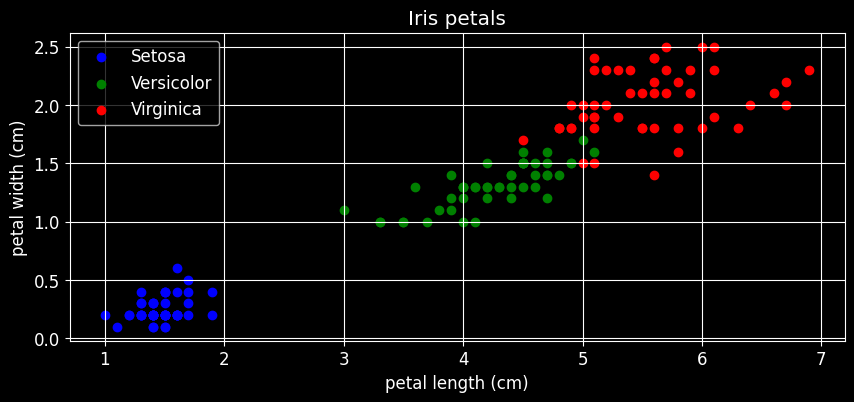

In [ ]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()

# labels and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

plt.show();

Parece promissor. Há diferença clara entre as espécies. Vejamos as sépalas (``sepal``).

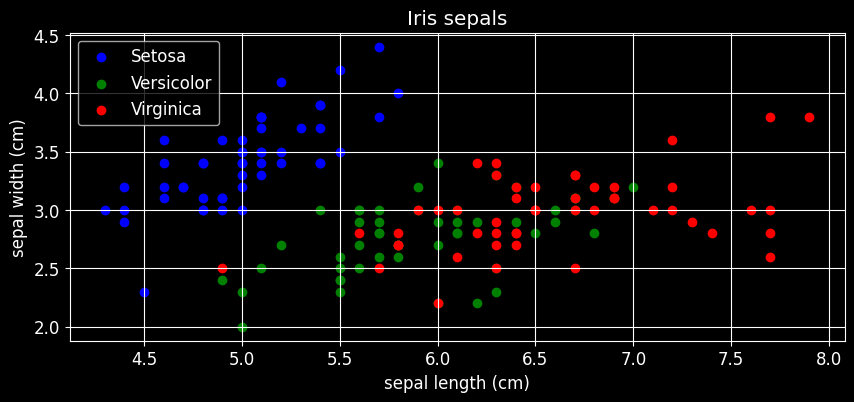

In [ ]:
fig, ax = plt.subplots()

# labels and scatter points
ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris sepals")
ax.legend()

plt.show();

Não tão animador, certo? 🤔 

Ficaremos com as pétalas como nosso descritor de classe.👍🏻

Preparação do Dataset
--

Como vamos considerar apenas ``petal length`` e ``petal width`` precisamos descartar ``sepal``. 




In [ ]:
# Droping the target and species since we only need the measurements
X = iris.drop(columns = ['target', 'species'], axis=1)
X.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Vamos tentar separar a espécie Setosa das outras duas espécies. Assim vamos converter 

In [ ]:
# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2, 3)]  # 3rd and 4th columns
y = iris['target'].to_numpy().astype(int)

E depois separar o dataset nos conjuntos de treinamento ($70\%$) e teste ($30\%$). Novamente a ``Scikit-learn`` nos auxilia com a função ``train_test_split``.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')


Training: 105 instances 
Test: 45 instances

Training shape:(105, 2) 
First row:[3.7 1. ]

Test shape:(45, 2) 
First row:[4.7 1.2]

Labels 
	training: 105 instances 
	test: 45 instances

Labels training shape:(105,) 
set:[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]

Labels test shape:(45,) 
set:[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


Treinamento do Perceptron
--


In [ ]:
perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)


(array([15.9837,  6.651 ]), 0.6010000000000004)

Predição e Avaliação
--


In [ ]:
pred = perceptron.predict(X_test)

Qual foi a acurácia?

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.29
[[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]


WTF! Apenas $29\%$! 😱 

Ruim para esse *dataset*. 

Bem, podemos usar a estratégia de tentar ajustar os hiperparâmetros (**hyperparameter tuning**). Por exemplo, aumentar a taxa de aprendizado (*learning rating* ou *epochs*) para digamos 1000.

In [ ]:
perceptron = Perceptron(0.001, 1000)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.29
[[ 0 19  0]
 [ 0 13  0]
 [ 0 13  0]]


Continua ruim! Outra estratégia é normalizar as entradas.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')

Training: 105 instances 
Test: 45 instances

Training shape:(105, 2) 
First row:[-0.09951105 -0.32339776]

Test shape:(45, 2) 
First row:[ 0.484213   -0.05282593]

Labels 
	training: 105 instances 
	test: 45 instances

Labels training shape:(105,) 
set:[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]

Labels test shape:(45,) 
set:[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [ ]:
perceptron = Perceptron(0.001, 100)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy:0.71
[[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]


C'est bon! 🥳
Uma taxa de $71\%$ já é aceitável. Mas errou todas as instâncias de uma classe. 😭

In [ ]:
from sklearn import metrics

#print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
#print(metrics.classification_report(y_test, pred, digits=2))

# Confusion matrix
#print(metrics.confusion_matrix(y_test, pred))

Vamos tentar entender como a decisão foi tomada.

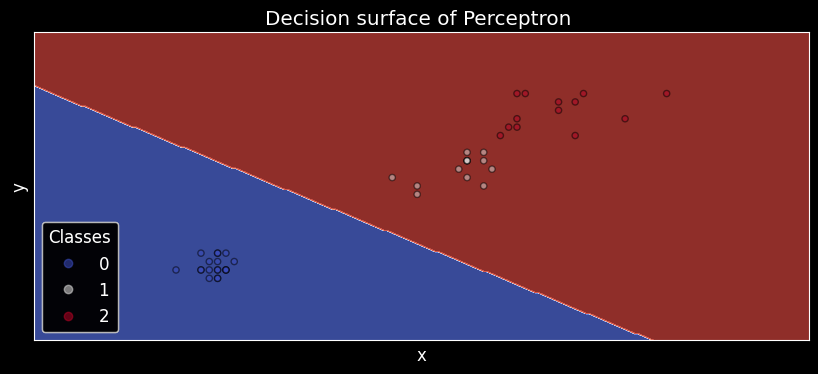

In [ ]:
def make_meshgrid(x, y, h=.02):
    """
    Generate a meshgrid of points based on input data x, y.

    Parameters
    ----------
    x : array-like
        Input data for x-axis.
    y : array-like
        Input data for y-axis.
    h : float, optional
        Step size for the meshgrid. Default is 0.02.

    Returns
    -------
    xx : ndarray
         Meshgrid array for x-axis.
    yy : ndarray
         Meshgrid array for y-axis.
    """       
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """
    Plot the decision boundaries of a classifier as contours on a 2D plot.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes on which to draw the contours.
    clf : sklearn.base.ClassifierMixin
        The classifier to use for predicting the class labels.
    xx : numpy.ndarray
        The x-coordinates of the points on the plot.
    yy : numpy.ndarray
        The y-coordinates of the points on the plot.
    **params : dict
        Additional parameters to pass to the `contourf()` function of the
        `matplotlib.axes.Axes` object.

    Returns
    -------
    out : matplotlib.contour.QuadContourSet
        The `QuadContourSet` object returned by the `contourf()` function.
    """    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    out = ax.contourf(xx, yy, Z, **params)

    return out

fig, ax = plt.subplots()

title = 'Decision surface of Perceptron'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, perceptron, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha = 0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


plt.show()

E como se comporta a implementação da ``Scikit-learn``? 

In [ ]:
from sklearn.linear_model import Perceptron

sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(sk_perceptron_pred, y_test)
print(f'Accuracy:{acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, sk_perceptron_pred))

Accuracy:0.76
[[11  8  0]
 [ 1 10  2]
 [ 0  0 13]]


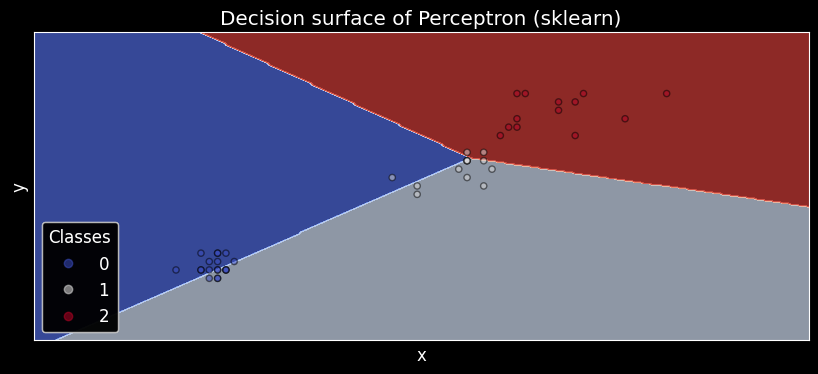

In [ ]:
fig, ax = plt.subplots()

title = 'Decision surface of Perceptron (sklearn)'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sk_perceptron, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

Conseguiu $76\%$! E melhor desempenho entre as interclasse!

E, só para finalizar, vejamos o desempenho de outro modelo mais complexo, como um **SVM**.

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy using SVM, RBF kernel: {acc:.2f}')

# Confusion matrix
print(metrics.confusion_matrix(y_test, pred))

Accuracy using SVM, RBF kernel: 1.00
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


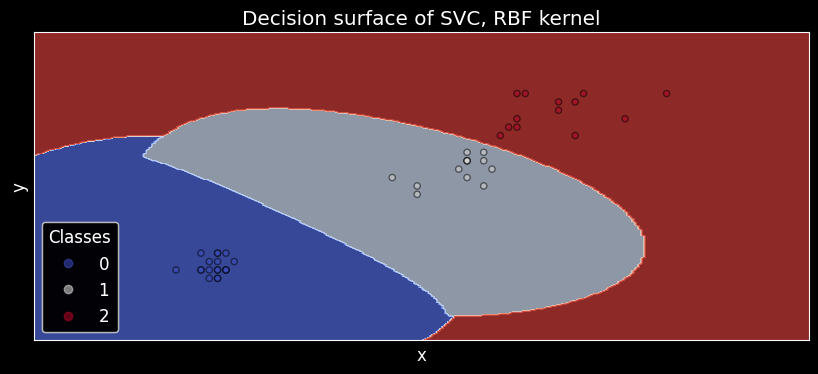

In [ ]:
fig, ax = plt.subplots()


title = 'Decision surface of SVC, RBF kernel'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

---
<font color="#ffb31a">Fabio Alexandre **SPANHOL**</font> <faspanhol@gmail.com>

<font color="#cccccc">*Updated: May 3rd 2023*</font>